# Cluster Analysis
- Cluster Analysis is a multivariate statistical technique which groups the observations based on some of features or variables they are described by
- Example: 
- Final goal: the goal of clustering is to maximize the similarity of observations within a cluster and maximise the dissimilarity between clusters.    

# For Example;

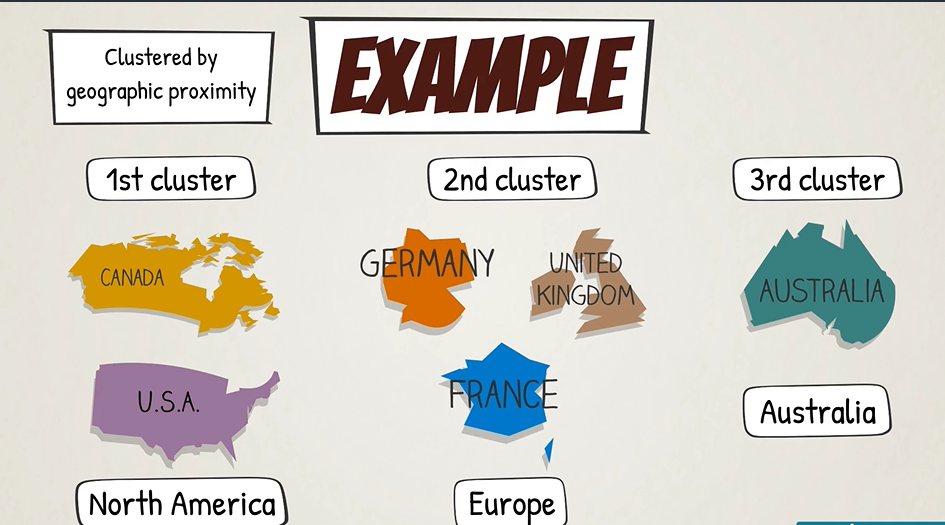

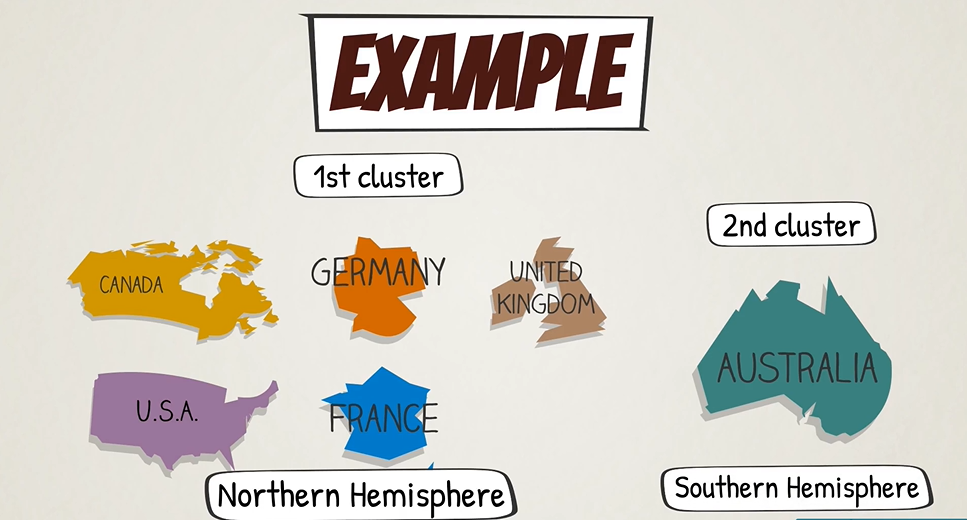

- we will learn :
    * several clustering problems
    * How to perform cluster analysis
    * how to find optimal number of clusters
    * how to identity appropriate features
    * how to interpret results

### Tools  to be used: 
    - Pandas
    - Sklearn

so far we know what 

1. cluster  analysis is ?
2. what are  clusters?
3 Whta is the final goal?

but what  we dont know is that

Why is it useful?

### example application 

1. Marget Segmentation
2.Image Segmentation

- cluster analysis : 
    * explore the data
    * identify the patterns

# Basics of Cluster Analysis

## Import relevant libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# load the data

In [35]:
data = pd.read_csv(r'C:\Users\shiv8\Downloads\3.01. Country clusters.csv')

In [36]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


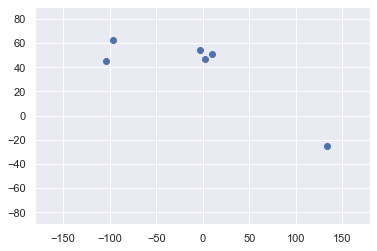

In [37]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

##  Select the features

In [38]:
X = data.iloc[:,1:3]

In [39]:
X

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# Clustering 

In [40]:
kmeans = KMeans(3)# here 3 is no.of clusters we want to create

In [44]:
kmeans.fit(X)

KMeans(n_clusters=3)

# clustering results 

In [9]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 1, 1, 1, 2])

In [10]:
data_with_clusters = data.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


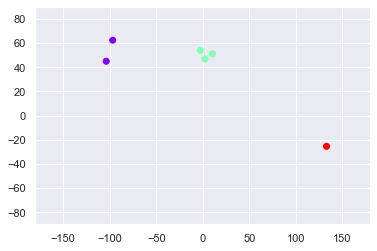

In [11]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## clustering the categorical data

- As we can see we have another piece of information that we did not used ,in order to use it we must first encode it in some other way 

### Map The data

In [12]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


### Select the features

In [13]:
# we can use a single feature as well
x = data_mapped.iloc[:,3:4]

In [14]:
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


### clustering

In [15]:
kmeans = KMeans(3)

In [16]:
kmeans


KMeans(n_clusters=3)

### clustering results

In [17]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 1, 2, 1])

In [18]:
data_with_clusters = data.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


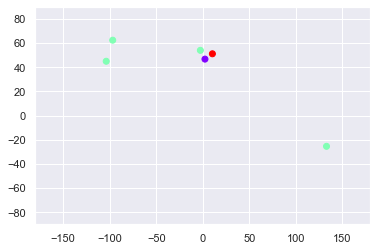

In [52]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

- The plot is unequivocal, plot contains 3 clusters USA,Canada,UK and Australia in first one .France in second and Germany in third one.

- By the way, we are still using the Longitude and Latitude as axes,unlike Regression this is clustering, data can be plotted in any ways. The cluster information is contained in cluster column in the dataframe data_with_clusters['cluster']and is the color of the points in the plot.

- the clustering can be done on both numerical and categorical data.

## selecting the number of clusters

- lets discuss the criterion for selecting the number of clusters, we now already  know that clustering is all about:-
    * Minimizing the distance between the points in clusters
    * Maximizing the distance between the clusters
- It turns out that for kmeans both things ocurr simultaneously
- distance between the points in cluster is called as **'within clusters Sum of squares'** or **WCSS**.
##### If we minimise the WCSS, we have reached the perfect clustering solution* but here is the problem
- problem1:
         # observations = 6
         # clusters = 6
         # WCSS = 0 Thats because there is just one pint in each cluster and we cant have wcss, furthermore the clusters are far as much as they can be.
- problem2:
         # observations = 1000000
         # clusters = 1000000
         # WCSS = 0 = min 
        A one million cluster solution is definetly of no use.similarly       
         # observations = 1000000
         # clusters = 1
         # WCSS = max
- By applying some common sense we can say that we dont want wcss to minimise  instead we want it to be as low as possible so that we can have small number of clusters and can interpret them:
         # observations = N 
         # clusters = SMALL
         # WCSS = LOW
        
- if we plot 'WCSS' against  number of clusters we get the  graph  as
 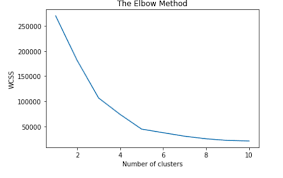
    * The graph shape  looks like an elbow hence it is called 'The Elbow Method'. By seeing the graph we can infer that WCSS is a monotnously decreasing function which is lower for bigger number of clusters.
    * Here is the big revelation is that in the begining WCSS is declining extremely fast at some point it reaches the elbow after that we are not reaching a much better solution in terms of WCSS by increasing the number of clusters . for our case we say the optimal number of clusters is 3  as this is the elbow thats the biggest number of clusters for which we are still getting a significant decrease in wcss thereafter there is almost no improvement.  
    * we need two piece of information 'number of clusters' called *k* and 'wcss' for specific number of cluster.*k* is set by us at the beginning of the process while there is sklearn  method through which WCSS is calculated.
    

## WCSS

In [55]:
kmeans.inertia_


288.10523333333333

- To plot the elbow we actually need to solve the problem with 1,2,3,4,5,6 and so on clusters and calculate WCSS.

In [56]:
wcss = []

for i in range(1,7):# as we have total of 6 observation in above example
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
    


In [58]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

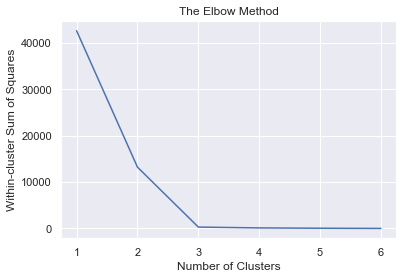

In [59]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

# Pros and Cons of K-meaans Clustering

### Pros
- Simple to  understand
- Fast to cluster
- widely available
- Easy to implement 
- Always yields a result*(also a con , as it may be deceiving)

### Cons 
- we ned to pick 'K'(remedy : The elbow method)
- Sensitize to initialization (Remedy: k-means++)
- Sensitive to outliers(remedy: remove outliers)
- Produces spherical solutons
- standardisation 

# To standardize or not to standardize?


## let's  consider a example of house and price  :
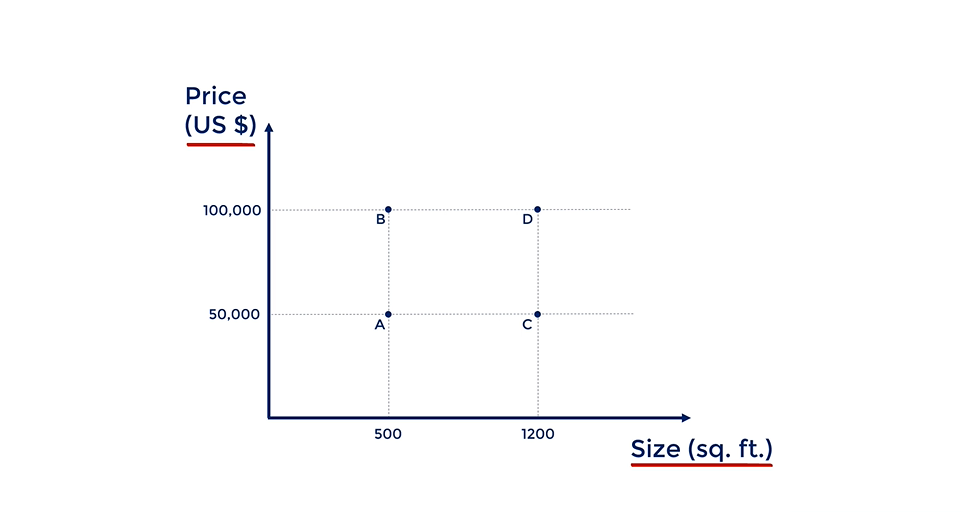

## how do we group the observations in clusters, well it could be like:
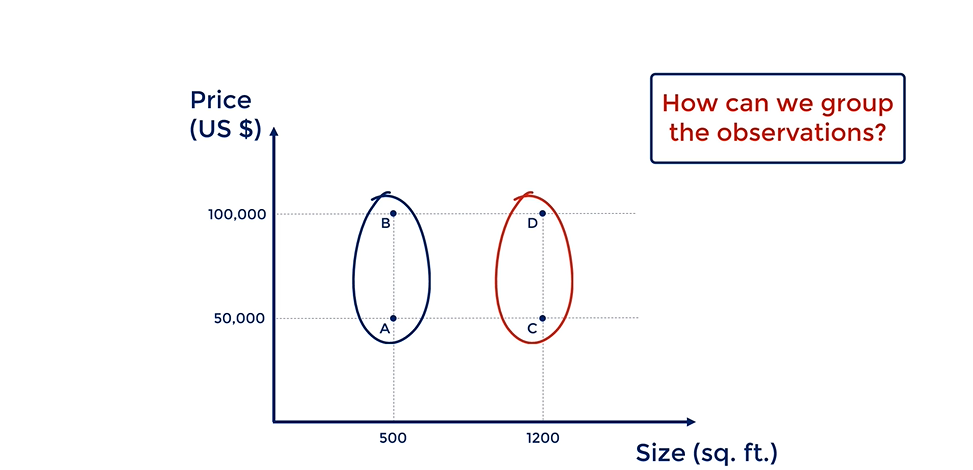
    

## and we try to standardize x axis we get resultant graph as :
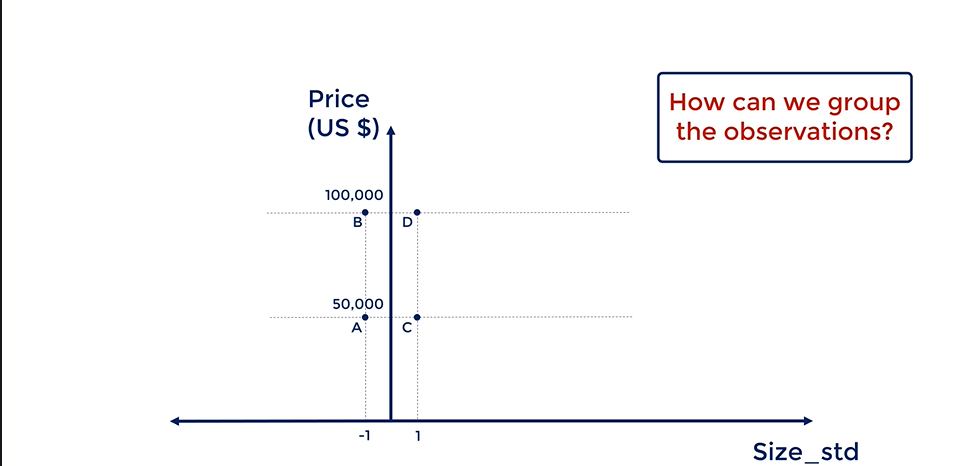
    
## and now lets standardize y-axis :
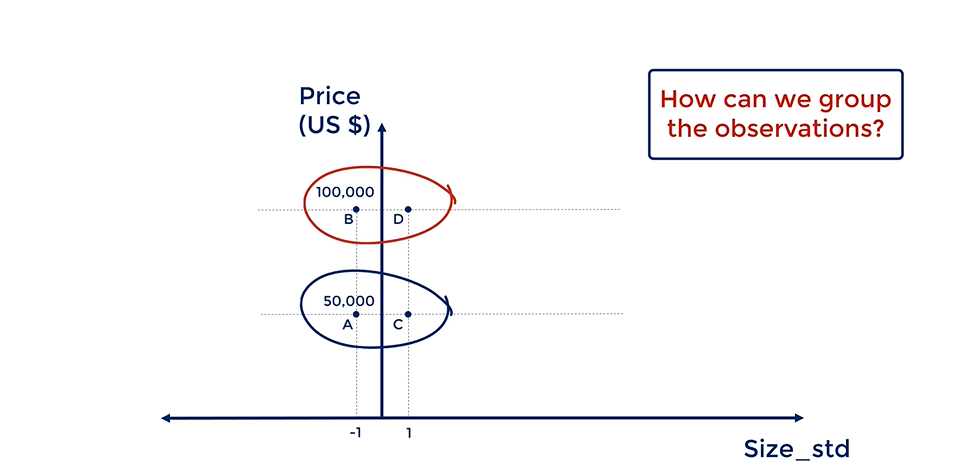

## and if we standardixe both the axes:
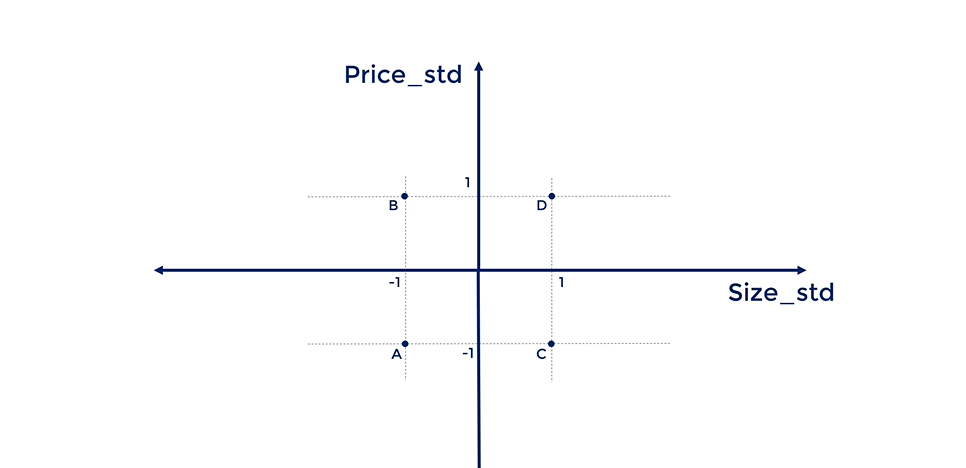

## so by standardizing we are getting completely different output
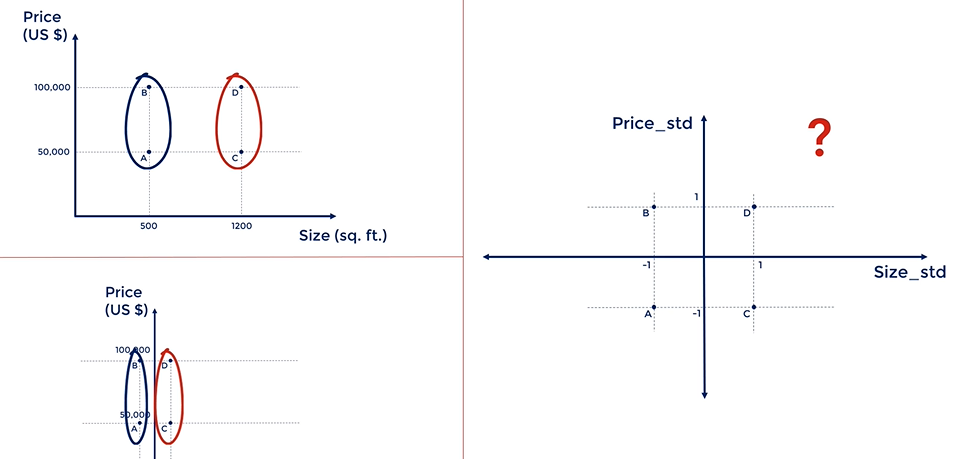

## the ultimate aim of standardization is to reduce the weight of higher numbers and increase the lower ones

## so if both the axes have same scale, from 0 to ~100000 the k means algorithm would immediately cluster with A with B and C with D
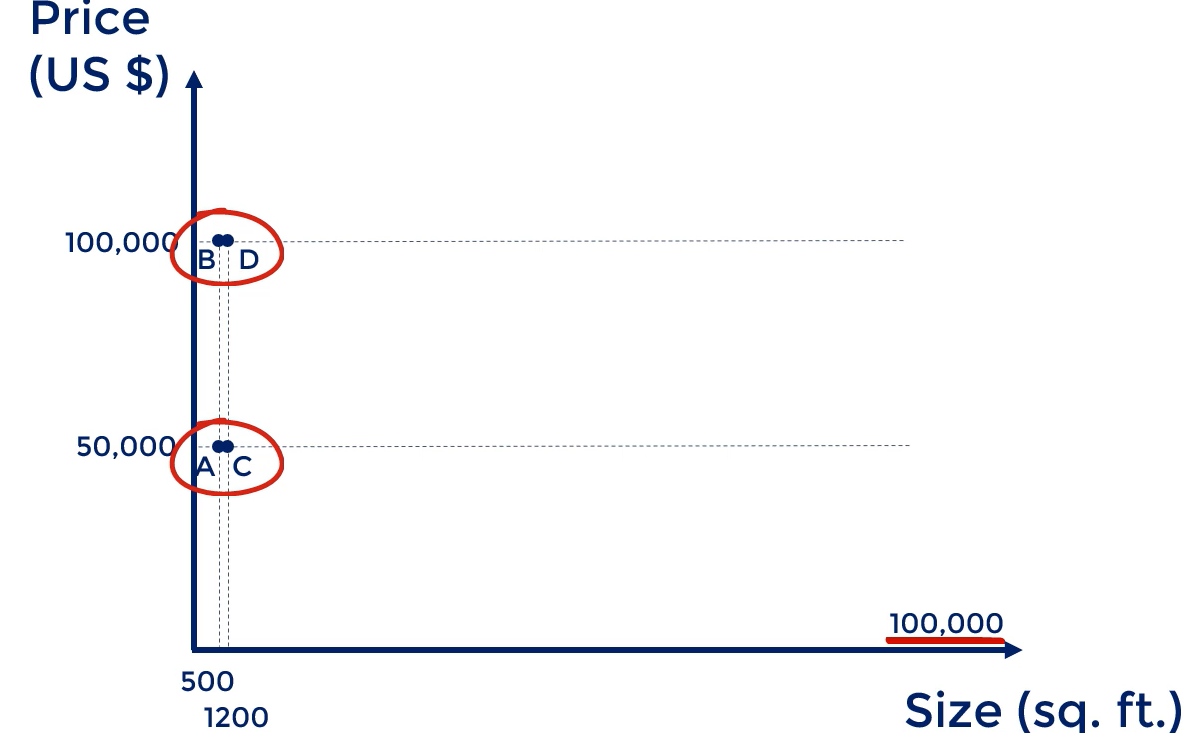

*  SO scale matters , in above example every rectangle on a graph (only 4points) after standardized turns into a square, and by standardizing both the axes we removed the WEIGHT introduced by the high price values.
*  To summarize if we do not standardize the range of values would serve as WEIGHTS for each variable, price have much higher value which would indicate  to k-means that price is more important, this would lead to clusters based on price 
*  standardisation is trying to put all variables on equal footing , the relationship could be one that needs no standardisation for example: [price-size ] relationship.
*  Also  one more important point is that clustering  helps to know about omitted variables unlike in regression analysis.for eg : In [price-size] problem 'location' variable  is also important.   